In [28]:
import pandas as pd

# Zaladowanie pliku z danymi
file_path = 'data/Zadanie_ecommerce SK - DANE.csv'
data = pd.read_csv(file_path)

# Wyświetlanie kilku pierwszych wierszy ramki danych w celu zrozumienia jej struktury
data.head()

,Default Channel Grouping,Date Range,Users,New Users,Sessions,Bounce Rate,Pages / Session,Avg. Session Duration,Transactions,Revenue
0,Organic Search,Period 1,"812,313","743,091","1,005,204",56.83%,3.31,0:02:44,"15,053","4,126,209"
1,Organic Search,Period 2,"696,395","655,146","853,495",58.39%,3.40,0:02:49,"11,161","2,803,571"
2,Paid Search,Period 1,"558,327","507,699","759,586",54.00%,3.53,0:02:31,"15,431","4,478,800"
3,Paid Search,Period 2,"440,985","403,901","583,746",50.94%,3.92,0:02:52,"8,569","2,099,737"
4,Social,Period 1,"167,878","158,082","220,085",57.55%,2.79,0:01:57,"2,741","792,345"


In [29]:
# Konwersja kolumn z liczbami w formacie ciągu znaków z przecinkami na liczby całkowite/zmiennoprzecinkowe
data['Users'] = data['Users'].str.replace(',', '').astype(int)
data['Sessions'] = data['Sessions'].str.replace(',', '').astype(int)
data['Transactions'] = data['Transactions'].str.replace(',', '').astype(int)
data['Revenue'] = data['Revenue'].str.replace(',', '').astype(float)

# Obliczanie współczynnika konwersji (CR) i średniej wartości transakcji (ATV)
data['CR'] = data['Transactions'] / data['Sessions']
data['ATV'] = data['Revenue'] / data['Transactions']

# Wybieranie kolumn do wyświetlania obliczonych CR i ATV
calculated_data = data[['Default Channel Grouping', 'Date Range', 'Users', 'Sessions', 'Transactions', 'Revenue', 'CR', 'ATV']]
calculated_data.head(20)

,Default Channel Grouping,Date Range,Users,Sessions,Transactions,Revenue,CR,ATV
0,Organic Search,Period 1,812313,1005204,15053,4126209.0,0.014975,274.112071
1,Organic Search,Period 2,696395,853495,11161,2803571.0,0.013077,251.193531
2,Paid Search,Period 1,558327,759586,15431,4478800.0,0.020315,290.246906
3,Paid Search,Period 2,440985,583746,8569,2099737.0,0.014679,245.038744
4,Social,Period 1,167878,220085,2741,792345.0,0.012454,289.071507
5,Social,Period 2,74854,100906,2072,549536.0,0.020534,265.220077
6,Direct,Period 1,119326,170454,3179,985848.0,0.018650,310.112614
7,Direct,Period 2,90035,127744,2391,617453.0,0.018717,258.240485
8,Referral,Period 1,71043,101252,2197,636718.0,0.021698,289.812472
9,Referral,Period 2,102930,132427,2308,581131.0,0.017428,251.789861


In [26]:
# Koszty marketingowe dla poszczególnych okresów i kanałów
koszty_marketingowe = {
    'Period 1': {'Performance Marketing': 800000, 'SEO': 100000, 'Inne': 400000},
    'Period 2': {'Performance Marketing': 400000, 'SEO': 60000, 'Inne': 200000}
}

# Dodanie kosztów marketingowych do danych
data['Koszt Marketingowy'] = data['Date Range'].map(lambda x: koszty_marketingowe[x]['Performance Marketing'] if 'Paid Search' in data['Default Channel Grouping'] else (koszty_marketingowe[x]['SEO'] if 'Organic Search' in data['Default Channel Grouping'] else koszty_marketingowe[x]['Inne']))

# Obliczenie kosztu konwersji (Cost per Conversion)
# data['Koszt Konwersji'] = data['Koszt Marketingowy'] / data['Transactions']

# Wybór kolumn do wyświetlenia obliczeń CR, ATV i Kosztu Konwersji
calculated_data_with_cost = data[['Default Channel Grouping', 'Date Range', 'Users', 'Sessions', 'Transactions', 'Revenue', 'CR', 'ATV', 'Koszt Marketingowy', 'Koszt Konwersji']]
calculated_data_with_cost.head()

,Default Channel Grouping,Date Range,Users,Sessions,Transactions,Revenue,CR,ATV,Koszt Marketingowy,Koszt Konwersji
0,Organic Search,Period 1,812313,1005204,15053,4126209.0,0.014975,274.112071,400000,6.643194
1,Organic Search,Period 2,696395,853495,11161,2803571.0,0.013077,251.193531,200000,5.375862
2,Paid Search,Period 1,558327,759586,15431,4478800.0,0.020315,290.246906,400000,51.843691
3,Paid Search,Period 2,440985,583746,8569,2099737.0,0.014679,245.038744,200000,46.679893
4,Social,Period 1,167878,220085,2741,792345.0,0.012454,289.071507,400000,145.932142


In [19]:
# Przygotowanie danych do ponownego przeliczenia CR, ATV i Kosztu Konwersji dla wszystkich kanałów
# Dodanie kosztów marketingowych do danych
def assign_marketing_cost(row):
    if 'Organic Search' in row['Default Channel Grouping']:
        return koszty_marketingowe[row['Date Range']]['SEO']
    elif 'Paid Search' in row['Default Channel Grouping']:
        return koszty_marketingowe[row['Date Range']]['Performance Marketing']
    else:
        return koszty_marketingowe[row['Date Range']]['Inne']

data['Koszt Marketingowy'] = data.apply(assign_marketing_cost, axis=1)

# Obliczenie kosztu konwersji dla wszystkich kolumn (Cost per Conversion)
data['Koszt Konwersji'] = data['Koszt Marketingowy'] / data['Transactions']

# Wybór kolumn do wyświetlenia obliczeń CR, ATV i Kosztu Konwersji
calculated_data_all_channels = data[['Default Channel Grouping', 'Date Range', 'Users', 'Sessions', 'Transactions', 'Revenue', 'CR', 'ATV', 'Koszt Marketingowy', 'Koszt Konwersji']]
calculated_data_all_channels.head()


,Default Channel Grouping,Date Range,Users,Sessions,Transactions,Revenue,CR,ATV,Koszt Marketingowy,Koszt Konwersji
0,Organic Search,Period 1,812313,1005204,15053,4126209.0,0.014975,274.112071,100000,6.643194
1,Organic Search,Period 2,696395,853495,11161,2803571.0,0.013077,251.193531,60000,5.375862
2,Paid Search,Period 1,558327,759586,15431,4478800.0,0.020315,290.246906,800000,51.843691
3,Paid Search,Period 2,440985,583746,8569,2099737.0,0.014679,245.038744,400000,46.679893
4,Social,Period 1,167878,220085,2741,792345.0,0.012454,289.071507,400000,145.932142


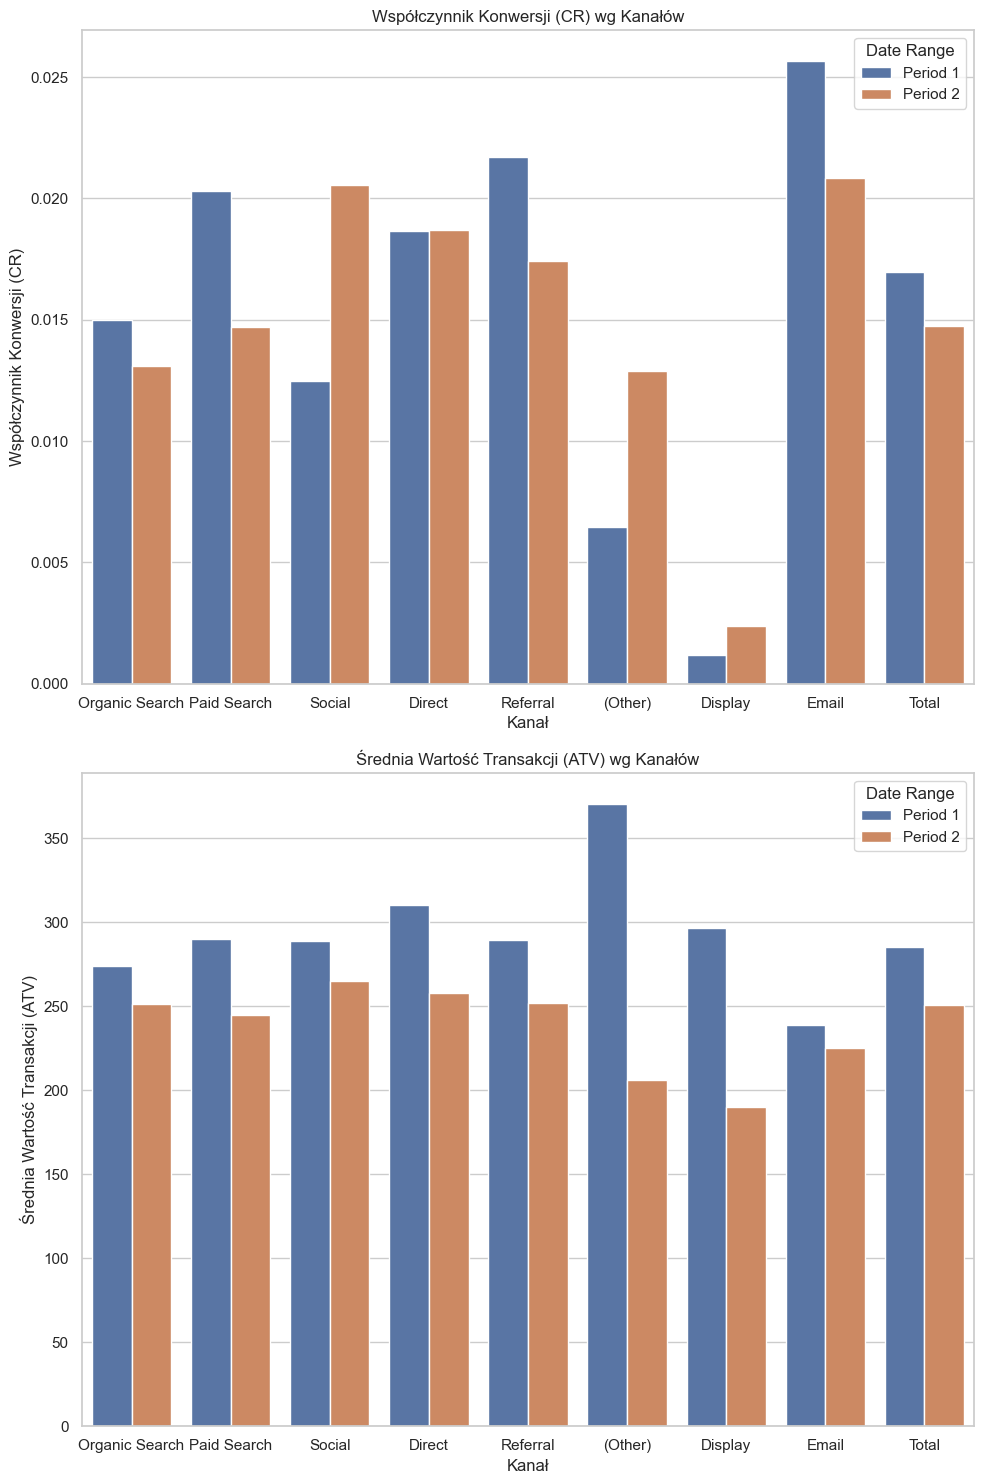

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ustawienie stylu wykresów
sns.set(style="whitegrid")

# Tworzenie dwoch wykresów: CR, ATV
fig, axes = plt.subplots(2, 1, figsize=(10, 15))

# Wykres dla CR
sns.barplot(x='Default Channel Grouping', y='CR', hue='Date Range', data=data, ax=axes[0])
axes[0].set_title('Współczynnik Konwersji (CR) wg Kanałów')
axes[0].set_ylabel('Współczynnik Konwersji (CR)')
axes[0].set_xlabel('Kanał')

# Wykres dla ATV
sns.barplot(x='Default Channel Grouping', y='ATV', hue='Date Range', data=data, ax=axes[1])
axes[1].set_title('Średnia Wartość Transakcji (ATV) wg Kanałów')
axes[1].set_ylabel('Średnia Wartość Transakcji (ATV)')
axes[1].set_xlabel('Kanał')

plt.tight_layout()
plt.show()


C:\Users\szymo\AppData\Local\Temp\ipykernel_5368\3588101837.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_revenue_by_channel.values, y=avg_revenue_by_channel.index, palette='viridis')


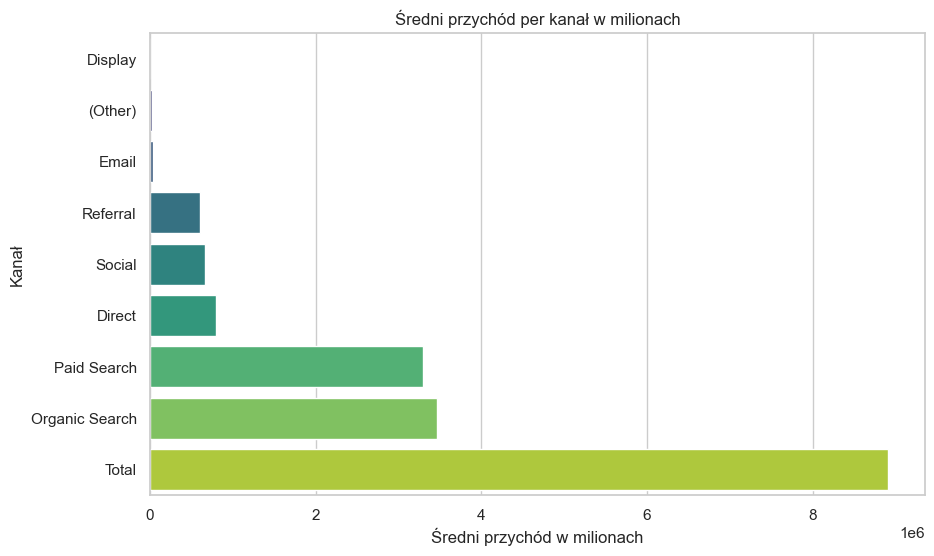

In [23]:
# Wykres słupkowy dla średniego przychodu według kanałów
plt.figure(figsize=(10, 6))
avg_revenue_by_channel = data.groupby('Default Channel Grouping')['Revenue'].mean().sort_values()
sns.barplot(x=avg_revenue_by_channel.values, y=avg_revenue_by_channel.index, palette='viridis')
plt.title('Średni przychód per kanał w milionach')
plt.xlabel('Średni przychód w milionach')
plt.ylabel('Kanał')
plt.show()

In [ ]:
# Konwersja 'Bounce Rate' i 'Avg. Session Duration'
for col in ['Bounce Rate', 'Avg. Session Duration']:
    if col == 'Bounce Rate':
        data[col] = data[col].str.rstrip('%').astype('float') / 100
    elif col == 'Avg. Session Duration':
        time_parts = data[col].str.split(':', expand=True)
        data[col] = time_parts[0].astype(int) * 3600 + time_parts[1].astype(int) * 60 + time_parts[2].astype(int)

summary = data.groupby('Date Range').sum()

# Zmiana procentowa dla kolumn pomiedzy okresami
percentage_change = ((summary.loc['Period 2'] - summary.loc['Period 1']) / summary.loc['Period 1']) * 100
percentage_change = percentage_change.to_frame('Percentage Change')
percentage_change = percentage_change.reset_index()
percentage_change.rename(columns={'index': 'Metric'}, inplace=True)
percentage_change['Metric'] = percentage_change['Metric'].str.replace('_', ' ').str.title()

# Zdefiniowanie kolorów słupków
bar_colors = ['green' if (value > 0 or metric == 'Bounce Rate') else 'red' for metric, value in percentage_change.values]

# Wykres słupkowy dla zmian procentowych
plt.figure(figsize=(10, 6))
plt.barh(percentage_change['Metric'], percentage_change['Percentage Change'], color=bar_colors)
plt.xlabel('Percentage Change')
plt.title('Percentage Change from Period 1 to Period 2 with Colored Bars')
plt.grid(axis='x')
plt.tight_layout()
plt.show()